In [1]:
import pandas as pd
import numpy as np
import itertools
import random
from collections import Counter

# visualization
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
def joint_plot_3d(x,y):
    # Define the borders
    deltaX = (max(x) - min(x))/10
    deltaY = (max(y) - min(y))/10
    xmin = min(x) - deltaX
    xmax = max(x) + deltaX
    ymin = min(y) - deltaY
    ymax = max(y) + deltaY
    print(xmin, xmax, ymin, ymax)
    # Create meshgrid
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = st.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)
    fig = plt.figure(figsize=(13, 7))
    ax = plt.axes(projection='3d')
    w = ax.plot_wireframe(xx, yy, f)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('PDF')
    ax.set_title('Joint PDF');
    
def joint_plot_cond_3d(x,y,x_cond, y_cond):
    # Define the borders
    deltaX = (max(x) - min(x))/10
    deltaY = (max(y) - min(y))/10
    xmin = min(x) - deltaX
    xmax = max(x) + deltaX
    ymin = min(y) - deltaY
    ymax = max(y) + deltaY
    print(xmin, xmax, ymin, ymax)
    # Create meshgrid
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = st.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)

    deltaX_cond = (max(x_cond) - min(x_cond))/10
    deltaY_cond = (max(y_cond) - min(y_cond))/10
    xmin_cond = min(x_cond) - deltaX_cond
    xmax_cond = max(x_cond) + deltaX_cond
    ymin_cond = min(y_cond) - deltaY_cond
    ymax_cond = max(y_cond) + deltaY_cond
    print(xmin_cond, xmax_cond, ymin_cond, ymax_cond)
    # Create meshgrid
    xx_cond, yy_cond = np.mgrid[xmin_cond:xmax_cond:100j, ymin_cond:ymax_cond:100j]
    positions_cond = np.vstack([xx_cond.ravel(), yy_cond.ravel()])
    values_cond = np.vstack([x_cond, y_cond])
    kernel_cond = st.gaussian_kde(values_cond)
    f_cond = np.reshape(kernel_cond(positions_cond).T, xx_cond.shape)

    fig = plt.figure(figsize=(13, 7))
    ax = plt.axes(projection='3d')
    ax.plot_wireframe(xx_cond, yy_cond, f_cond, color="orange",zorder = 0.3)
    ax.plot_wireframe(xx, yy, f, color="blue",zorder = 0.5)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('PDF')
    ax.set_title('Joint PDF');

In [3]:
data1 = pd.read_csv('insurance.csv')
data1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data1[['bmi', 'children', 'charges']].describe()

,bmi,children,charges
count,1338.000000,1338.000000,1338.000000
mean,30.663397,1.094918,13270.422265
std,6.098187,1.205493,12110.011237
min,15.960000,0.000000,1121.873900
25%,26.296250,0.000000,4740.287150
50%,30.400000,1.000000,9382.033000
75%,34.693750,2.000000,16639.912515
max,53.130000,5.000000,63770.428010


# Grouping bedasarkan Sex


In [5]:
data_male = data1[data1['sex'] == 'male']
data_female = data1[data1['sex'] == 'female']

In [6]:
jumlah_male = len(data_male)
jumlah_female = len(data_female)

In [7]:
data_male.describe()

,age,bmi,children,charges
count,676.000000,676.000000,676.000000,676.000000
mean,38.917160,30.943129,1.115385,13956.751178
std,14.050141,6.140435,1.218986,12971.025915
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.410000,0.000000,4619.134000
50%,39.000000,30.687500,1.000000,9369.615750
75%,51.000000,34.992500,2.000000,18989.590250
max,64.000000,53.130000,5.000000,62592.873090


In [8]:
data_female.describe()

,age,bmi,children,charges
count,662.000000,662.000000,662.000000,662.000000
mean,39.503021,30.377749,1.074018,12569.578844
std,14.054223,6.046023,1.192115,11128.703801
min,18.000000,16.815000,0.000000,1607.510100
25%,27.000000,26.125000,0.000000,4885.158700
50%,40.000000,30.107500,1.000000,9412.962500
75%,51.750000,34.313750,2.000000,14454.691825
max,64.000000,48.070000,5.000000,63770.428010


In [29]:
smoke_all = data1[data1['smoker'] == 'yes']
smoke_man = data_male[data_male['smoker'] == 'yes']
smoke_woman = data_female[data_female['smoker'] == 'yes']

no_smoke_all = data1[data1['smoker'] == 'no']
no_smoke_man = data_male[data_male['smoker'] == 'no']
no_smoke_woman = data_female[data_female['smoker'] == 'no']

In [44]:
len(no_smoke_man) / len(no_smoke_all)

0.4859022556390977

In [45]:
len(no_smoke_woman) / len(no_smoke_all)

0.5140977443609023

In [24]:
smoke_all.describe()

,age,bmi,children,charges
count,274.000000,274.000000,274.000000,274.000000
mean,38.514599,30.708449,1.113139,32050.231832
std,13.923186,6.318644,1.157066,11541.547176
min,18.000000,17.195000,0.000000,12829.455100
25%,27.000000,26.083750,0.000000,20826.244213
50%,38.000000,30.447500,1.000000,34456.348450
75%,49.000000,35.200000,2.000000,41019.207275
max,64.000000,52.580000,5.000000,63770.428010


In [25]:
no_smoke_all.describe()

,age,bmi,children,charges
count,1064.000000,1064.000000,1064.000000,1064.000000
mean,39.385338,30.651795,1.090226,8434.268298
std,14.083410,6.043111,1.218136,5993.781819
min,18.000000,15.960000,0.000000,1121.873900
25%,26.750000,26.315000,0.000000,3986.438700
50%,40.000000,30.352500,1.000000,7345.405300
75%,52.000000,34.430000,2.000000,11362.887050
max,64.000000,53.130000,5.000000,36910.608030


In [26]:
smoke_man.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,159.000000,159,159.000000,159.000000,159,159,159.000000
unique,NaN,1,NaN,NaN,1,4,NaN
top,NaN,male,NaN,NaN,yes,southeast,NaN
freq,NaN,159,NaN,NaN,159,55,NaN
mean,38.446541,NaN,31.504182,1.188679,NaN,NaN,33042.005975
std,13.751247,NaN,5.952028,1.170144,NaN,NaN,11202.670862
min,18.000000,NaN,17.290000,0.000000,NaN,NaN,12829.455100
25%,27.000000,NaN,27.360000,0.000000,NaN,NaN,21241.526875
50%,38.000000,NaN,31.130000,1.000000,NaN,NaN,36085.219000
75%,49.500000,NaN,35.565000,2.000000,NaN,NaN,41797.589050


In [27]:
no_smoke_man.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,517.000000,517,517.000000,517.000000,517,517,517.000000
unique,NaN,1,NaN,NaN,1,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,517,NaN,NaN,517,134,NaN
mean,39.061896,NaN,30.770580,1.092843,NaN,NaN,8087.204731
std,14.150768,NaN,6.192641,1.233844,NaN,NaN,5908.108989
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.220000,0.000000,NaN,NaN,3659.346000
50%,39.000000,NaN,30.495000,1.000000,NaN,NaN,6985.506950
75%,51.000000,NaN,34.430000,2.000000,NaN,NaN,10959.330000


In [28]:
smoke_woman.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,115.000000,115,115.000000,115.000000,115,115,115.000000
unique,NaN,1,NaN,NaN,1,4,NaN
top,NaN,female,NaN,NaN,yes,southeast,NaN
freq,NaN,115,NaN,NaN,115,36,NaN
mean,38.608696,NaN,29.608261,1.008696,NaN,NaN,30678.996276
std,14.217419,NaN,6.663802,1.135516,NaN,NaN,11907.536381
min,18.000000,NaN,17.195000,0.000000,NaN,NaN,13844.506000
25%,26.500000,NaN,24.650000,0.000000,NaN,NaN,19696.432100
50%,39.000000,NaN,28.380000,1.000000,NaN,NaN,28950.469200
75%,48.500000,NaN,34.352500,2.000000,NaN,NaN,40918.314500


In [29]:
no_smoke_woman.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,547.000000,547,547.000000,547.000000,547,547,547.00000
unique,NaN,1,NaN,NaN,1,4,NaN
top,NaN,female,NaN,NaN,no,southwest,NaN
freq,NaN,547,NaN,NaN,547,141,NaN
mean,39.691042,NaN,30.539525,1.087751,NaN,NaN,8762.29730
std,14.025538,NaN,5.901781,1.204226,NaN,NaN,6060.77597
min,18.000000,NaN,16.815000,0.000000,NaN,NaN,1607.51010
25%,27.000000,NaN,26.357500,0.000000,NaN,NaN,4265.59910
50%,40.000000,NaN,30.210000,1.000000,NaN,NaN,7639.41745
75%,52.000000,NaN,34.307500,2.000000,NaN,NaN,11786.16660


In [34]:
smoke_all[["sex", "age", "bmi", "charges"]].groupby("sex").mean()

,age,bmi,charges
sex,,,
female,38.608696,29.608261,30678.996276
male,38.446541,31.504182,33042.005975


In [33]:
no_smoke_all[["sex", "age", "bmi", "charges"]].groupby("sex").mean()

,age,bmi,charges
sex,,,
female,39.691042,30.539525,8762.297300
male,39.061896,30.770580,8087.204731


In [6]:
data2 = data1.copy()

# Grouping Anak

In [7]:
no_child = data2[data2['children'] == 0] 
child = data2[data2['children'] != 0] 

In [8]:
child.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,764.000000,764,764.000000,764.000000,764,764,764.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,391,NaN,NaN,605,207,NaN
mean,39.780105,NaN,30.748370,1.917539,NaN,NaN,13949.941093
std,11.927317,NaN,6.144777,0.983351,NaN,NaN,12138.305911
min,18.000000,NaN,16.815000,1.000000,NaN,NaN,1711.026800
25%,30.000000,NaN,26.378750,1.000000,NaN,NaN,5809.641625
50%,40.000000,NaN,30.495000,2.000000,NaN,NaN,9223.829500
75%,49.000000,NaN,34.625000,3.000000,NaN,NaN,18232.392400


In [12]:
child[child['smoker'] == 'yes'].describe()

,age,bmi,children,charges
count,159.000000,159.000000,159.000000,159.000000
mean,39.761006,30.827610,1.918239,32562.935014
std,12.104220,6.667907,0.871261,11510.852448
min,18.000000,17.195000,1.000000,12829.455100
25%,30.000000,25.770000,1.000000,21178.966000
50%,40.000000,30.780000,2.000000,36124.573700
75%,48.500000,35.750000,3.000000,42055.877800
max,64.000000,52.580000,5.000000,60021.398970


In [13]:
no_child[no_child['smoker'] == 'yes'].describe()

,age,bmi,children,charges
count,115.000000,115.000000,115.0,115.000000
mean,36.791304,30.543696,0.0,31341.363954
std,16.000272,5.825971,0.0,11596.678789
min,18.000000,19.300000,0.0,13747.872350
25%,21.000000,26.790000,0.0,20057.034600
50%,33.000000,30.250000,0.0,33900.653000
75%,51.500000,34.415000,0.0,39202.221650
max,64.000000,47.410000,0.0,63770.428010


In [15]:
child[child['smoker'] == 'no'].describe()

,age,bmi,children,charges
count,605.000000,605.000000,605.000000,605.00000
mean,39.785124,30.727545,1.917355,9058.26170
std,11.890509,6.005444,1.011415,6024.64780
min,18.000000,16.815000,1.000000,1711.02680
25%,30.000000,26.600000,1.000000,4949.75870
50%,40.000000,30.400000,2.000000,7626.99300
75%,49.000000,34.210000,3.000000,10959.69470
max,64.000000,50.380000,5.000000,36910.60803


In [16]:
no_child[no_child['smoker'] == 'no'].describe()

,age,bmi,children,charges
count,459.000000,459.00000,459.0,459.000000
mean,38.858388,30.55195,0.0,7611.793335
std,16.534851,6.09753,0.0,5858.529189
min,18.000000,15.96000,0.0,1121.873900
25%,22.000000,26.03000,0.0,2259.522025
50%,37.000000,30.30500,0.0,6185.320800
75%,56.000000,34.81750,0.0,11835.471150
max,64.000000,53.13000,0.0,30259.995560


# Continous Variable Analysis

In [30]:
data_bmi = data1[['smoker','bmi', 'charges']]
data_bmi

,smoker,bmi,charges
0,yes,27.900,16884.92400
1,no,33.770,1725.55230
2,no,33.000,4449.46200
3,no,22.705,21984.47061
4,no,28.880,3866.85520
...,...,...,...
1333,no,30.970,10600.54830
1334,no,31.920,2205.98080
1335,no,36.850,1629.83350
1336,no,25.800,2007.94500


In [13]:
data_bmi.describe(include='all')

,bmi,charges
count,1338.000000,1338.000000
mean,30.663397,13270.422265
std,6.098187,12110.011237
min,15.960000,1121.873900
25%,26.296250,4740.287150
50%,30.400000,9382.033000
75%,34.693750,16639.912515
max,53.130000,63770.428010


In [68]:
bmi_1 = data_bmi[(data_bmi['bmi'] >= 15) & (data_bmi['bmi'] < 26)]
bmi_2 = data_bmi[(data_bmi['bmi'] >= 26) & (data_bmi['bmi'] < 30)]
bmi_3 = data_bmi[(data_bmi['bmi'] >= 30) & (data_bmi['bmi'] < 34.5)]
bmi_4 = data_bmi[data_bmi['bmi'] >= 34.5]

In [88]:
bmi_1.median(), print(end= '  '), bmi_2.median(), bmi_3.median(), bmi_4.median()

(bmi          23.4000
 charges    8605.3615
 dtype: float64,
 None,
 bmi          28.0375
 charges    8574.5103
 dtype: float64,
 bmi          32.2000
 charges    9628.1585
 dtype: float64,
 bmi           37.620
 charges    10713.644
 dtype: float64)

In [95]:
print('Median Charges dari BMI 1 adalah {} \n BMI 2 adalah {}\n BMI 3 adalah {}\n BMI 4 adalah {}'.format(bmi_1['charges'].median(), bmi_2['charges'].median(), bmi_3['charges'].median(), bmi_4['charges'].median()))

Median Charges dari BMI 1 adalah 8605.3615 
 BMI 2 adalah 8574.5103
 BMI 3 adalah 9628.1585
 BMI 4 adalah 10713.643999999998


In [96]:
print('Rata-rata Charges dari BMI 1 adalah {}\n BMI 2 adalah {} \n BMI 3 adalah {}\n BMI 4 adalah {}'.format(bmi_1['charges'].mean(), bmi_2['charges'].mean(), bmi_3['charges'].mean(), bmi_4['charges'].mean()))

Rata-rata Charges dari BMI 1 adalah 10368.051867728705
 BMI 2 adalah 11062.583987894905 
 BMI 3 adalah 14291.983511939889
 BMI 4 adalah 16905.088595659825


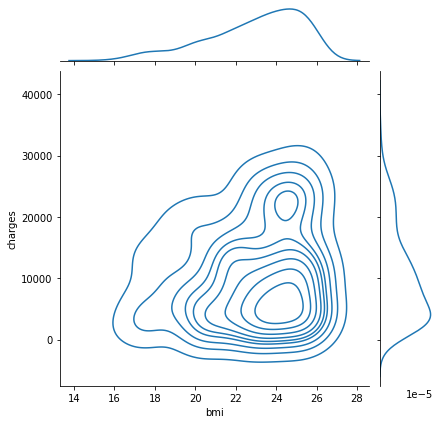

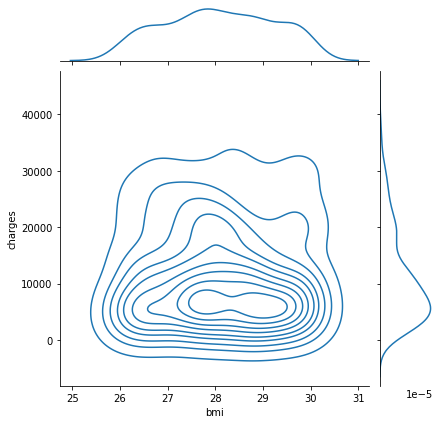

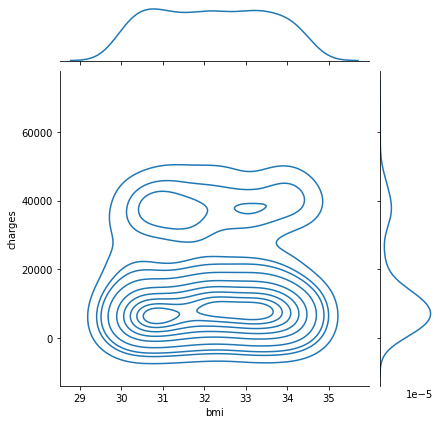

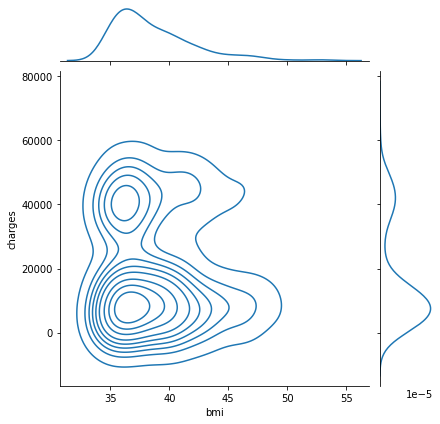

In [72]:
sns.jointplot(x='bmi', y='charges', data=bmi_1, kind='kde')
sns.jointplot(x='bmi', y='charges', data=bmi_2, kind='kde')
sns.jointplot(x='bmi', y='charges', data=bmi_3, kind='kde')
sns.jointplot(x='bmi', y='charges', data=bmi_4, kind='kde')

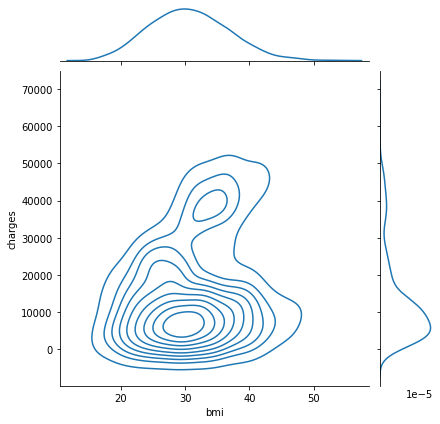

In [15]:
sns.jointplot(x='bmi', y='charges', data=data_bmi, kind='kde')

12.243 56.847 -5142.981511 70035.283421


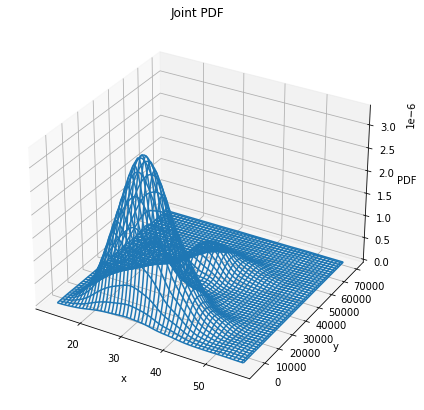

In [20]:
joint_plot_3d(x = data_bmi['bmi'], y = data_bmi['charges'])

In [30]:
data_bmi_25 = data_bmi[(data_bmi['bmi'] >= 25) & (data_bmi['smoker'] == 'yes')]

,smoker,bmi,charges
0,yes,27.900,16884.92400
11,yes,26.290,27808.72510
14,yes,42.130,39611.75770
19,yes,35.300,36837.46700
23,yes,31.920,37701.87680
...,...,...,...
1308,yes,30.200,33900.65300
1313,yes,34.700,36397.57600
1321,yes,26.695,28101.33305
1323,yes,40.370,43896.37630


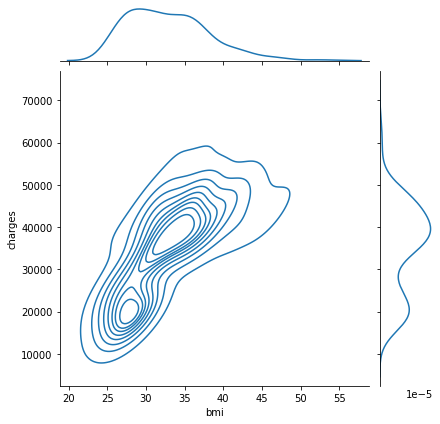

In [33]:
sns.jointplot(x='bmi', y='charges', data=data_bmi_25, kind='kde')

22.352 55.327999999999996 10692.955473999999 68595.652786


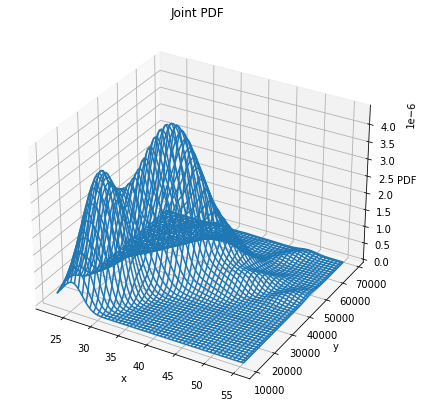

In [35]:
joint_plot_3d(x = data_bmi_25['bmi'], y = data_bmi_25['charges'])

In [34]:
data_bmi_25

,smoker,bmi,charges
0,yes,27.900,16884.92400
11,yes,26.290,27808.72510
14,yes,42.130,39611.75770
19,yes,35.300,36837.46700
23,yes,31.920,37701.87680
...,...,...,...
1308,yes,30.200,33900.65300
1313,yes,34.700,36397.57600
1321,yes,26.695,28101.33305
1323,yes,40.370,43896.37630


In [36]:
data_bmi_25[data_bmi_25['charges'] > 16700]

,smoker,bmi,charges
0,yes,27.900,16884.92400
11,yes,26.290,27808.72510
14,yes,42.130,39611.75770
19,yes,35.300,36837.46700
23,yes,31.920,37701.87680
...,...,...,...
1308,yes,30.200,33900.65300
1313,yes,34.700,36397.57600
1321,yes,26.695,28101.33305
1323,yes,40.370,43896.37630


In [37]:
len(data_bmi_25[data_bmi_25['charges'] > 16700]) / len(data_bmi_25)

0.9817351598173516

In [40]:
data_bmi_smoke = data_bmi[data_bmi['smoker'] == 'yes']

data_bmi_smoke

,smoker,bmi,charges
0,yes,27.900,16884.92400
11,yes,26.290,27808.72510
14,yes,42.130,39611.75770
19,yes,35.300,36837.46700
23,yes,31.920,37701.87680
...,...,...,...
1313,yes,34.700,36397.57600
1314,yes,23.655,18765.87545
1321,yes,26.695,28101.33305
1323,yes,40.370,43896.37630


In [44]:
len(data_bmi_smoke[data_bmi_smoke['charges'] > 16700]) / len(data_bmi_smoke)

0.927007299270073

In [45]:
len(data_bmi[data_bmi['bmi'] >= 25]) / len(data_bmi)

0.8168908819133034

In [46]:
len(data_bmi[data_bmi['bmi'] < 25]) / len(data_bmi)

0.18310911808669655

In [31]:
bmi_over_25 = data_bmi[data_bmi['bmi'] >= 25]
bmi_under_25 = data_bmi[data_bmi['bmi'] < 25]

In [55]:
len(bmi_over_25[bmi_over_25['charges'] > 16700]) / len(bmi_over_25)

0.25892040256175664

In [56]:
len(bmi_under_25[bmi_under_25['charges'] > 16700]) / len(bmi_under_25)

0.20816326530612245

In [59]:
bmi_over_25_smoke = bmi_over_25[bmi_over_25['smoker'] == 'yes']
bmi_over_25_no_smoke = bmi_over_25[bmi_over_25['smoker'] == 'no']


In [60]:
len(bmi_over_25_smoke[bmi_over_25_smoke['charges'] > 16700]) / len(bmi_over_25_smoke)

0.9817351598173516

In [61]:
len(bmi_over_25_no_smoke[bmi_over_25_no_smoke['charges'] > 16700]) / len(bmi_over_25_no_smoke)

0.07780320366132723

# Hypothesis Testing

In [10]:
#Pake data smoke_all dan no_smoke_all
data1.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
np.var(data1['charges'])

146542766.49354792

In [12]:
smoke_all.describe()

,age,bmi,children,charges
count,274.000000,274.000000,274.000000,274.000000
mean,38.514599,30.708449,1.113139,32050.231832
std,13.923186,6.318644,1.157066,11541.547176
min,18.000000,17.195000,0.000000,12829.455100
25%,27.000000,26.083750,0.000000,20826.244213
50%,38.000000,30.447500,1.000000,34456.348450
75%,49.000000,35.200000,2.000000,41019.207275
max,64.000000,52.580000,5.000000,63770.428010


In [23]:
var1 = smoke_all['charges']
var2 = no_smoke_all['charges']

In [13]:
no_smoke_all.describe()

,age,bmi,children,charges
count,1064.000000,1064.000000,1064.000000,1064.000000
mean,39.385338,30.651795,1.090226,8434.268298
std,14.083410,6.043111,1.218136,5993.781819
min,18.000000,15.960000,0.000000,1121.873900
25%,26.750000,26.315000,0.000000,3986.438700
50%,40.000000,30.352500,1.000000,7345.405300
75%,52.000000,34.430000,2.000000,11362.887050
max,64.000000,53.130000,5.000000,36910.608030


In [14]:
a = np.var(smoke_all['charges'])
b = np.var(no_smoke_all['charges'])

In [19]:
a_mean = smoke_all['charges'].mean()
b_mean = no_smoke_all['charges'].mean()

In [21]:
valuez = a_mean - b_mean
valuez

23615.963533676637

In [18]:
from statsmodels.stats.weightstats import ztest as ztest

In [ ]:
alpha = 0.05

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [27]:
ztest(var1, var2, value=valuez, alternative='smaller') 


(0.0, 0.5)

In [ ]:
bmi_over_25
bmi_under_25 


In [36]:
var3 = bmi_over_25['charges']
var4 = bmi_under_25['charges']
value2 = var3.mean() - var4.mean()

In [48]:
ztest(var3, var4, value=value2, alternative='smaller') 

(0.0, 0.5)

In [50]:
var6 = data_male['charges']
var7 = data_female['charges']
value3 = var6.mean() - var7.mean()

ztest(var6, var7, value=value3, alternative='smaller') 

(0.0, 0.5)